# This notebook is for Pre-Processing and Classification on Framingham Heart Disease Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Now we will read the csv data file with pandas and display the first five rows.

In [2]:
heart = pd.read_csv("framingham_heart_disease.csv")
heart["prevalentStroke"].unique()

array([0, 1], dtype=int64)

In [3]:
heart.shape                # size of our data set

(4238, 16)

In [4]:
heart.describe()          # This shows the all stastical information about our data.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
heart.info()                # with the help of this line we can see that some attributes contains null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# We can see that here education cigsperday BPMeds totChol BMI glucose features are having null values
# Here education column don't have any relation with smoker , and cigsPerday is also acquired in curentsmoker. So here we are going to drop this 2 columns.

In [7]:
heart=heart.drop('education',axis=1)
heart=heart.drop('currentSmoker',axis=1)
heart=heart.drop('BMI',axis=1)
heart=heart.drop('heartRate',axis=1)

In [8]:
heart.dropna(axis=0,inplace=True)   # droping the rows having null values

In [9]:
heart.isnull().sum()            # now our data is clear , it doesn't contain any null values


male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
glucose            0
TenYearCHD         0
dtype: int64

# Here we can see all the features values are already numerical so we don't need to do data type conversion in suitable data type. We can do that with the help of pd.get_dummies(heart[feature_name]) .This is also called as dummy variable.

# Let's see what is the range of the different features with the help of visualizaion

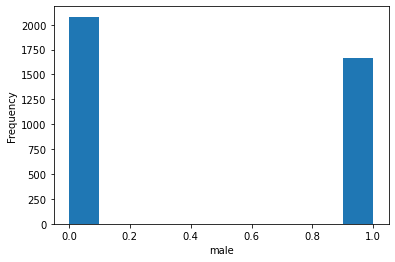

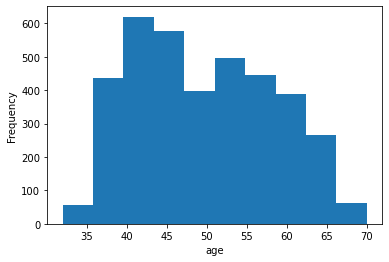

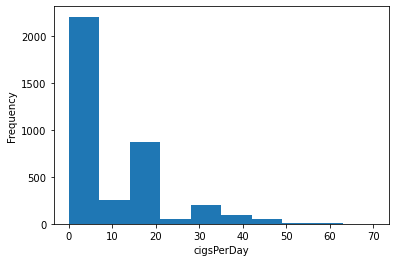

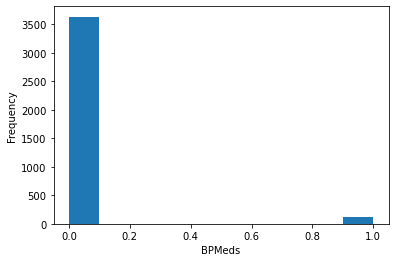

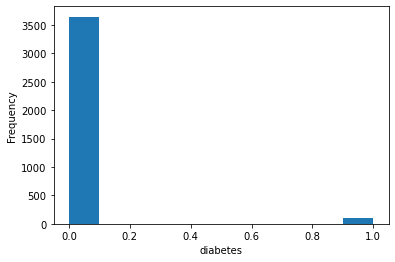

In [10]:
plt.hist(heart["male"])
plt.xlabel("male")
plt.ylabel("Frequency")
plt.show()

plt.hist(heart["age"])
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

plt.hist(heart["cigsPerDay"])
plt.xlabel("cigsPerDay")
plt.ylabel("Frequency")
plt.show()

plt.hist(heart["BPMeds"])
plt.xlabel("BPMeds")
plt.ylabel("Frequency")
plt.show()

plt.hist(heart["diabetes"])
plt.xlabel("diabetes")
plt.ylabel("Frequency")
plt.show()

# As we can see that the range of all attributes are not same.

In [36]:
cigsPerDayMean,cigsPerDayStd = heart["cigsPerDay"].mean(),heart["cigsPerDay"].std()
ageMean,ageStd = heart["age"].mean(),heart["age"].std()
totCholMean,totCholStd = heart["totChol"].mean(),heart["totChol"].std()
sysBPMean,sysBPStd = heart["sysBP"].mean(),heart["sysBP"].std()
diaBPMean,diaBPStd = heart["diaBP"].mean(),heart["diaBP"].std()
BMIMean,BMIStd = heart["BMI"].mean(),heart["BMI"].std()
heartRateMean,heartRateStd = heart["heartRate"].mean(),heart["heartRate"].std()
glucoseMean,glucoseStd = heart["glucose"].mean(),heart["glucose"].std()

In [122]:
heart["cigsPerDay"] = (heart["cigsPerDay"]-heart["cigsPerDay"].mean())/(heart["cigsPerDay"].std())
heart["age"] = (heart["age"]-heart["age"].mean())/(heart["age"].std())
heart["totChol"] = (heart["totChol"]-heart["totChol"].mean())/(heart["totChol"].std())
heart["sysBP"] = (heart["sysBP"]-heart["sysBP"].mean())/(heart["sysBP"].std())
heart["diaBP"] = (heart["diaBP"]-heart["diaBP"].mean())/(heart["diaBP"].std())
# heart["BMI"] = (heart["BMI"]-heart["BMI"].mean())/(heart["BMI"].std())
# heart["heartRate"] = (heart["heartRate"]-heart["heartRate"].mean())/(heart["heartRate"].std())
heart["glucose"] = (heart["glucose"]-heart["glucose"].mean())/(heart["glucose"].std())
heart.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
0,1,-1.233154,-0.755168,0.0,0,0,0,-0.939189,-1.192916,-1.082517,-0.204007,0
1,0,-0.418206,-0.755168,0.0,0,0,0,0.293587,-0.514829,-0.161023,-0.245489,0
2,1,-0.185364,0.923627,0.0,0,0,0,0.181516,-0.220991,-0.244795,-0.494384,0
3,0,1.328109,1.763024,0.0,0,1,0,-0.266766,0.796140,1.011787,0.874536,1
4,0,-0.418206,1.175446,0.0,0,0,0,1.078080,-0.107976,0.090293,0.127853,0


# Here we have normalized our data set with Z-score normalization, Z = (SCORE - MEAN) / S.D . We can also use other normalization methods like MIn-Max normalization and log normalization but here we used Z-score normalizaion.

In [10]:
x=heart.iloc[:,0:11].values                     
y=heart.iloc[:,-1].values 
print(x,y.shape)                                   # creating input and target numpy arrays

[[  1.   39.    0.  ... 106.   70.   77. ]
 [  0.   46.    0.  ... 121.   81.   76. ]
 [  1.   48.   20.  ... 127.5  80.   70. ]
 ...
 [  1.   50.    1.  ... 179.   92.   86. ]
 [  1.   51.   43.  ... 126.5  80.   68. ]
 [  0.   52.    0.  ... 133.5  83.  107. ]] (3764,)


# Using Logistic Regression Algorithm

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print(len(X_train))
print(len(X_test))

3011
753


In [12]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression()
fit=lgt.fit(X_train,y_train)
fit

c:\users\bhavya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
trainscore=lgt.score(X_train,y_train)
trainscore

0.8465626037861176

In [14]:
testscore=lgt.score(X_test,y_test)
testscore

0.8565737051792829

In [45]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lgt, open(filename, 'wb'))

In [15]:
y_predict=lgt.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [16]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))
cfmat = confusion_matrix(y_test, y_predict)
print()

Confusion Matrix
[[641   3]
 [105   4]]



In [17]:
accuracy = ((cfmat[0][0]+cfmat[1][1])*100)/(cfmat[0][0]+cfmat[1][1]+cfmat[0][1]+cfmat[1][0])
accuracy

85.65737051792829

# Using Decision Tree Algorithm

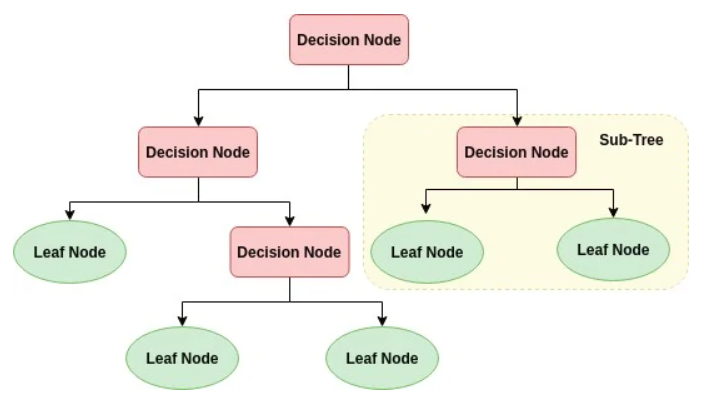

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
classifier.score(X_test,y_test)

0.7636122177954847

In [29]:
y_pred = classifier.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
cfmat = confusion_matrix(y_test, y_pred)
print()

[0 1 0 ... 0 0 0]
Confusion Matrix
[[1010   39]
 [  29  165]]



In [21]:
accuracy = ((cfmat[0][0]+cfmat[1][1])*100)/(cfmat[0][0]+cfmat[1][1]+cfmat[0][1]+cfmat[1][0])
accuracy

74.5019920318725

In [22]:
# from sklearn import tree
# # text_representation = tree.export_text(Tree)
# print(text_representation)
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(Tree, 
#                    feature_names=['male', 'age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate','glucose'],  
#                    class_names=['TenYearCHD', 'non_TenYearCHD'],
#                    filled=True)
# plt.savefig("Tree2.pdf") 

# Using Neural Network with PyTorch

In [97]:
from sklearn.model_selection import train_test_split
print(x.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
from torch.utils.data import Dataset,DataLoader
import torch
device = 'cpu'
import torch.nn as nn
print(len(X_train),len(X_test))

(3764, 11) (3764,)
3011 753


In [98]:
X_train_tensor = torch.from_numpy(X_train)
Y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, 
                                                Y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, 256, 
                                             shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, 
                                                y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset)
len(test_loader)

753

In [103]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(11, 6,bias = True),
            nn.SELU(),
            nn.Linear(6, 1,bias = True),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


In [104]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)
    for batch, (X, y) in enumerate(train_loader):
        model.train()
        X,y = X.to(device),y.to(device)
        pred = model(X.float())
        loss = loss_fn(pred.squeeze(), y.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
#             print(X,y)
#             break
            X,y = X.to(device),y.to(device)
            pred = model(X.float()).to(device)
            y  = y.view(-1,1).to(device)
            test_loss += loss_fn(pred.view(-1,1), y.float()).item()
            pred = torch.tensor(0).to(device) if pred<0.45 else torch.tensor(1).to(device)
            correct += (pred.view(-1,1) == y).type(torch.float).sum().item()
            if Flag:
                predList.append(pred)
                testList.append(y)
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [105]:
predList = []
testList = []
model = NeuralNetwork().to(device)
print(model)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001,)
Flag = False
epochs = 150
for t in range(epochs):
    if t == 49:
        Flag = True
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
#     test_loop(test_dataloader, model, loss_fn)
#     break

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11, out_features=6, bias=True)
    (1): SELU()
    (2): Linear(in_features=6, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
Epoch 1
-------------------------------
loss: 4.536187  [    0/ 3011]
Test Error: 
 Accuracy: 83.3%, Avg loss: 4.998765 

Epoch 2
-------------------------------
loss: 4.521686  [    0/ 3011]
Test Error: 
 Accuracy: 83.3%, Avg loss: 4.833128 

Epoch 3
-------------------------------
loss: 4.007864  [    0/ 3011]
Test Error: 
 Accuracy: 83.3%, Avg loss: 4.660650 

Epoch 4
-------------------------------
loss: 3.705625  [    0/ 3011]
Test Error: 
 Accuracy: 83.3%, Avg loss: 4.475269 

Epoch 5
-------------------------------
loss: 4.933210  [    0/ 3011]
Test Error: 
 Accuracy: 83.3%, Avg loss: 4.271606 

Epoch 6
-------------------------------
loss: 3.355902  [    0/ 3011]
Test Error: 
 Accuracy: 83.3%, Avg loss: 4.055422 

Epoch 7
-------------------------------
loss: 3.854230  [   

Test Error: 
 Accuracy: 79.0%, Avg loss: 0.584966 

Epoch 67
-------------------------------
loss: 0.519875  [    0/ 3011]
Test Error: 
 Accuracy: 79.2%, Avg loss: 0.581981 

Epoch 68
-------------------------------
loss: 0.528633  [    0/ 3011]
Test Error: 
 Accuracy: 79.2%, Avg loss: 0.578632 

Epoch 69
-------------------------------
loss: 0.578935  [    0/ 3011]
Test Error: 
 Accuracy: 79.3%, Avg loss: 0.575610 

Epoch 70
-------------------------------
loss: 0.412415  [    0/ 3011]
Test Error: 
 Accuracy: 79.3%, Avg loss: 0.572621 

Epoch 71
-------------------------------
loss: 0.590958  [    0/ 3011]
Test Error: 
 Accuracy: 79.3%, Avg loss: 0.570446 

Epoch 72
-------------------------------
loss: 0.564918  [    0/ 3011]
Test Error: 
 Accuracy: 79.0%, Avg loss: 0.567067 

Epoch 73
-------------------------------
loss: 0.453799  [    0/ 3011]
Test Error: 
 Accuracy: 80.2%, Avg loss: 0.566427 

Epoch 74
-------------------------------
loss: 0.488011  [    0/ 3011]
Test Error: 
 Ac

Test Error: 
 Accuracy: 83.1%, Avg loss: 0.507011 

Epoch 134
-------------------------------
loss: 0.532561  [    0/ 3011]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.504491 

Epoch 135
-------------------------------
loss: 0.481828  [    0/ 3011]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.503867 

Epoch 136
-------------------------------
loss: 0.446950  [    0/ 3011]
Test Error: 
 Accuracy: 83.1%, Avg loss: 0.506836 

Epoch 137
-------------------------------
loss: 0.535957  [    0/ 3011]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.502747 

Epoch 138
-------------------------------
loss: 0.411473  [    0/ 3011]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.503421 

Epoch 139
-------------------------------
loss: 0.510370  [    0/ 3011]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.502939 

Epoch 140
-------------------------------
loss: 0.523442  [    0/ 3011]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.502534 

Epoch 141
-------------------------------
loss: 0.414551  [    0/ 3011]
Test Err

# As we can see that the accuracy of our Logistic Regression Model is 85.6% which is greater than other two models.

In [36]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(testList, predList))

Confusion Matrix
[[2135    0]
 [ 386    0]]


In [50]:
tensor = torch.FloatTensor([0,52,0,0,0,0,0,269,133.5,21.47,107])
array = np.array([0,52,0,0,0,0,0,269,133.5,21.47,107])
array = array.reshape(1,-1)

In [93]:
pred = model(tensor)
pred = torch.tensor(0).to(device) if pred<0.45 else torch.tensor(1).to(device)

In [94]:
print(pred)

tensor(0)


In [42]:
torch.save(model.state_dict(),"HeartModelWeights.pt")

In [51]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(array)

In [52]:
print(result)

[0]
